In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import pathlib
import shutil
import urllib.parse
import urllib.request
import json

In [2]:
base_url = 'https://nominatim.openstreetmap.org/search.php?'
name = 'aachen'
output_name = 'aachen'
params = {'q': name, 'polygon_geojson': 1, 'format': 'json'}
url = base_url + urllib.parse.urlencode(params)

print(f'Querying url {url}')

contents = urllib.request.urlopen(url).read()
response = json.loads(contents)

Querying url https://nominatim.openstreetmap.org/search.php?q=aachen&polygon_geojson=1&format=json


Analyzing place Aachen, Städteregion Aachen, Nordrhein-Westfalen, Deutschland with ID 307484287


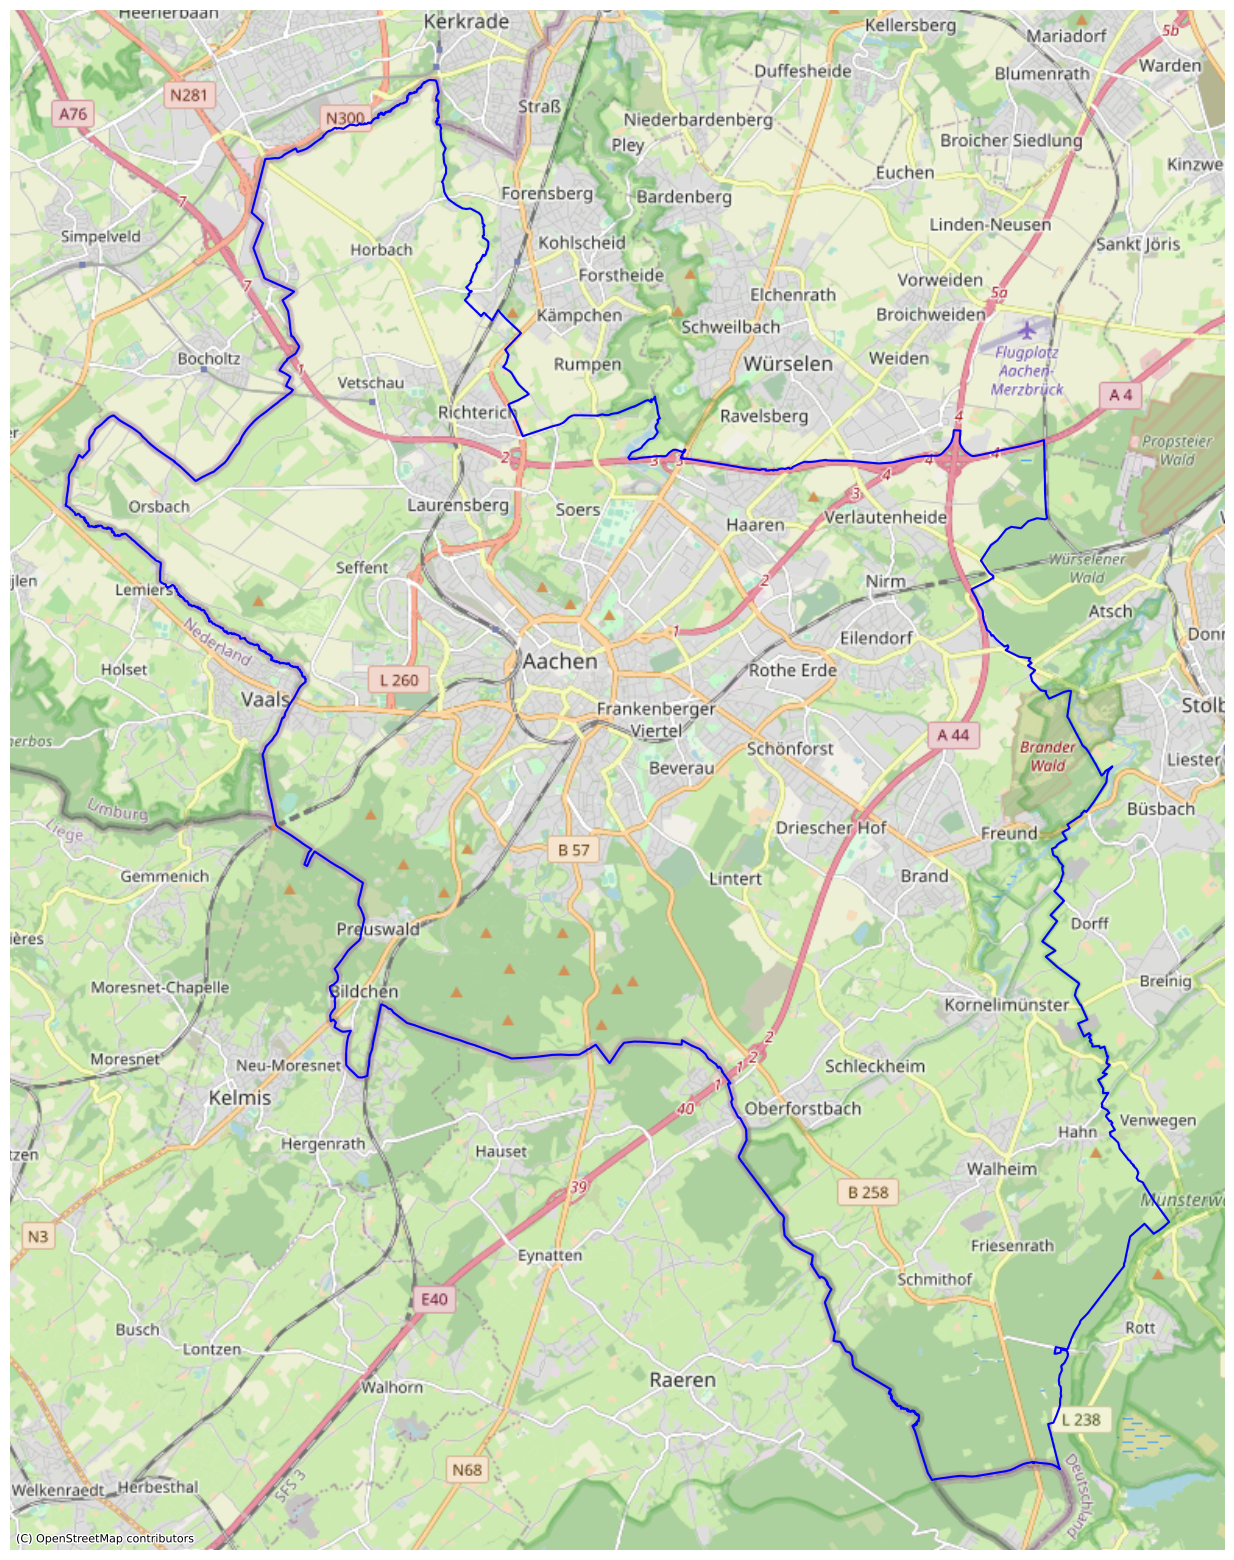

Analyzing place Aachen, Mörschwil, Wahlkreis Rorschach, Sankt Gallen, 9402, Schweiz/Suisse/Svizzera/Svizra with ID 23944879
Analyzing place Peterstraße 11, Aachen, Peterstraße, Kaiserplatz, Frankenberger Viertel, Aachen-Mitte, Aachen, Städteregion Aachen, Nordrhein-Westfalen, 52062, Deutschland with ID 65186901
Analyzing place Aachen, Henricistraße, Henricistraße, Europadorf, Aachen-Mitte, Aachen, Städteregion Aachen, Nordrhein-Westfalen, 52072, Deutschland with ID 65963347


In [3]:
number_places = 4

places = response[:number_places]

filtered_places = {}

for place in places:
    place_id = place.get('place_id')
    licence = place.get('licence')
    osm_type = place.get('osm_type')
    osm_id = place.get('osm_id')
    boundingbox = place.get('boundingbox')
    lat = place.get('lat')
    lon = place.get('lon')
    display_name = place.get('display_name')
    place_class = place.get('class')
    place_type = place.get('type')
    importance = place.get('importance')
    icon = place.get('icon')
    geojson = place.get('geojson')
    print(f'Analyzing place {display_name} with ID {place_id}')
    gdf = gpd.read_file(json.dumps(geojson), driver='GeoJSON')
    
    if gdf.geom_type[0] != 'Polygon':
        pass
    else:
        gdf = gdf.set_crs(4326, allow_override=True)
        filtered_places[place_id] = gdf
        
        plot_gdf = gdf.to_crs(epsg=3857)

        # Plot the map
        ax = plot_gdf.boundary.plot(figsize=(20, 20), alpha=1.0, edgecolor='blue')
        ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
        #ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
        #ctx.add_basemap(ax, source=ctx.providers.Stamen.Watercolor)
        #ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
        ax.set_axis_off()
        plt.show()

In [4]:
selected_id = 307484287

final_gdf = filtered_places[selected_id]

In [ ]:
data_path = pathlib.Path('../workflow/input')
data_path.mkdir(parents=True, exist_ok=True)

output_path = data_path / output_name
output_path.mkdir(parents=True, exist_ok=True)

final_gdf.to_file(output_path / f'{selected_id}.shp')